## Project 1 - Ordinary differential equations - Projectile motion in 2D

Due Monday, Oct 28, 9am.


1. Read the Project Marking Rubric Document on Canvas
2. See the Project 1 background document on Canvas

Consider a projectile of mass $m$ launchd at an angle $\theta$ to the horizontal from level ground. It reaches the ground some distance $d$ away from the launch site. The equation of motion of the projectile with atmospheric drag (at low enough speeds that no turbulence is created) is: $$ m \frac{d\vec{v}}{dt} = m g \hat(y) -c\vec{v},$$
where $\vec{v}(t) = (v_x(t), v_y(t))$ is the projectile velocity at time $t$. The constant $c$ characterizes the atmosphereic friction. (As an aside, if the motion of the projectile is fast enough that turbulence is created, the friction term changes to $-bv^2$). We will integrate the equation of motion numerically in this project. However, in this case, an analytic solution is possible. If we call $\vec{r}(t) = (x(t), y(t))$ the position of the projectile at time $t$, the equation of motion can be integrated to give:
$$x(t) =\frac{v_0v_T}{g}(1-e^{-gt/v_t}) \cos\theta $$
$$y(t) = \frac{v_T}{g} (v_T + v_0 \sin\theta)(1-e^{-gt/v_t}) - v_T t$$
where $v_T = mg/c$ is the terminal velocity, and $v_0$ is the initial speed.

Objectives: You will implement a numerical solution of the differential equation with `odeint()` and compare the trajectory you find to the analytic solution above. Use the analytic solution _only at the very end_, to plot along with the numerical solution. The analytic solution should not be used as part of the numerical solution.

Use the following parameters and initial conditions:
- $c$ = 0.65 kg/s
- $g$ = 9.81 m/2$^2$
- $m$ = 0.1 kg
- $v_0$ = 10 m/s
- $\theta$ = 50$^\circ$ above the horizonal

The questions you need to consider are:
- What is the distance $d$ to impact?
- What is the maximum height, $h$, reached?
- What is the time of flight, $T$?
- What is the velocity, $v_I$ at the impact point?

Your code should determine answers to these questions from the data returned by `odeint()`, and print them to the screen.
Your code should continue to operate well if parameters like $c,$ $m$, $v_0$, and $\theta$ are changed - it should choose a sensible range of times to integrate over based on the parameters used.

Make a plot that shows the trajectory in the $x,y$ plane. The numerical solution should be shown as a series of about 20 points that are evenly spaced in time (so that the distance between them communicates the speed of the projectile) that are not connected by lines. On the same plot, show the analytical solution as a solid line (without points).

Note that the grading for the projects will be very, very different from the grading of the exercises. **Read the project marking rubric document before you start.** Feel free to add additional cells below to split your code up if you wish to. 

Please list the names, and describe the roles of **anyone other than yourself** who contributed to the work shown here.


In [6]:
%reload_ext pycodestyle_magic

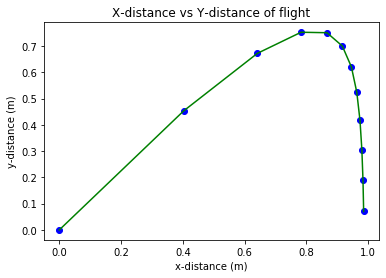

Distance travelled before impact: 0.9858m 
Maxium height reached: 0.7526m 
Total time of flight: 0.8852s 
Velocity at impact point: 1.4803 m/s 


In [28]:
# Script return time of flight,total distance travelled,
# maximum height reached, impact velocity of the object, and
# graph of its journey
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math


# function returns array of velocity_x, velocity_y,
# acceleration_x, and acceleration_y
def model(yAF, tF):
    dx = yAF[2]  # dx/dt
    dy = yAF[3]  # dy/dt
    dvx = -c*yAF[2]/m  # dv_x/dt
    dvy = (-g) - (c*yAF[3])/m  # dv_y/dt
    return np.array([dx, dy, dvx, dvy])


#  find where object hits the ground and return trimmed array
def SliceM(model):
    n = 1
    for m in range(model.shape[0]):
        # find where y pos is <= 0 (hit the ground)
        if(model[m][n] <= 0 and m != 0):
            return model[0:m:, ]


c = 0.65  # drag
g = 9.81  # gravity
m = 0.1   # mass
v0 = 10  # initial velocity
theta = math.radians(50)  # launch angle, level ground is horizontal
t0 = 0  # time of launch
steps = 20


# initial[x,y,v_x,v_y]
y0 = np.array([0, 0, v0*np.cos(theta), v0*np.sin(theta)])
tmax = (v0/g)*1.5
t1 = np.linspace(t0, tmax, steps)
M = SliceM(odeint(model, y0, t1))  # [x,y,v_x,v_y] over course of flight
t1 = t1[0:M.shape[0]]

x = M[:, 0]  # x distance
y = M[:, 1]  # y distance

impactX = x[len(x)-1]  # distance to impact
maxY = y[np.argmax(y)]  # max height
timeFlight = t1[len(x)-1]  # Flight time
# impact velocity
impact_v = np.sqrt((M[M.shape[0]-1][M.shape[1]-1])**2 +
                   (M[M.shape[0]-1][M.shape[1]-2])**2)


# Analytical values
vT = m*g/c  # terminal velocity
An_x = (v0*vT/g) * (1 - np.exp(-g*t1/vT))*np.cos(theta)
An_y = (vT/g) * (vT + v0*np.sin(theta))*(1 - np.exp(-g*t1/vT)) - vT*t1

plt.plot(x, y, 'bo')
plt.plot(An_x, An_y, 'g')
plt.title("X-distance vs Y-distance of flight")
plt.xlabel("x-distance (m)")
plt.ylabel("y-distance (m)")
plt.show()

print("Distance travelled before impact: {0:.4f}m ".format(impactX))
print("Maxium height reached: {0:.4f}m ".format(maxY))
print("Total time of flight: {0:.4f}s ".format(timeFlight))
print("Velocity at impact point: {0:.4f} m/s ".format(impact_v))

Please explain here any new functionality you have used and any extensions you have implemented. Extensions may be incorporated with your main code, or may appear separately below.
YOUR ANSWER HERE